# Assignment 1, Question 2: Pollution

* TEAM NUMBER = 2
* TEAM MEMBER 1 = Naomi Moonen, TEAM MEMBER 2 = Nick Sieraad, TEAM MEMBER 3 = Vincie Vossenaar, TEAM MEMBER 4 = Kevin Reijnders

## NO_2
The [NO2 dataset](https://www.openml.org/d/547) contains 500 measurement of pollution caused by cars. The goal is to predict the concentration of $NO_2$ from data about traffic and atmospheric conditions. Remove the 'day' feature (it is temporal and requires special treatment).

In [1]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

In [2]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, attribute_names = no2.get_data(target=no2.default_target_attribute, return_attribute_names=True);

In [3]:
# Remove the Days feature. This requires special treatment.
X = np.delete(X, 6, 1)
attribute_names = attribute_names[:-1]

1_ Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment? (1 point)
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

In [4]:
#imports
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

**Histograms of the data**

6 Histograms were created to visualize the distribution of frequencies for each variable. Apart from the attribute 'temperature_at_2m', no attribute appears to have a distribution that is nearly normal. Instead, the attributes have a skewed distribution. The attributes 'cars_per_hour' and 'temperature_diff_2m_25m' have a clear peak, over 140 and nearly 300 observations respectively. The attribute 'hour_of_day' is different than the others, because it has discrete values between 1 and 24 instead of continuous values. Since there is a difference in frequencies between
different hours, measurements were not performed at each hour equally often. The histogram for the NO2 level looks nearly normal. It is unimodal with a peak just over 175 observations. 

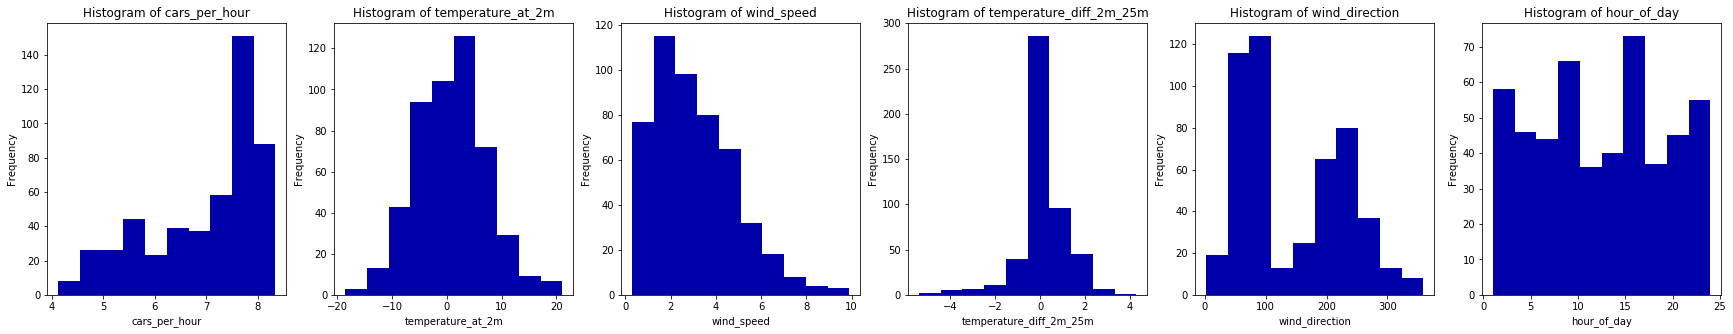

In [5]:
#Create a histogram for each attribute with a for loop
fig, axes = plt.subplots(1, 6, figsize= (30, 5));
for i in range (0, 6):
    axes[i].hist((X[:,i])); 
    s= attribute_names[i]
    axes[i].set_title("Histogram of " + s)
    axes[i].set_xlabel(attribute_names[i]);
    axes[i].set_ylabel("Frequency")


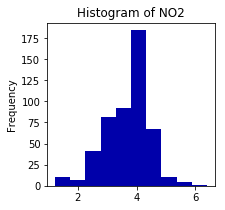

In [6]:
#Create a histogram for the y-variable NO2
plt.figure(figsize=(3, 3));
plt.hist(y);
plt.title("Histogram of NO2");
plt.ylabel("Frequency");
plt.show();    

**Scatterplots of the data**

Scatterplots were created to display the values for each attribute against the NO2 levels that were measured. From the scatterplots, it appears that the NO2 level increases slightly when the 'cars_per_hour' increase. When the 'wind_speed' increases, the NO2 level decreases slightly. The plot for 'hours_of_day' looks a bit different again, because hours have discrete values. There are more low levels of NO2 for early hours, which could mean that NO2 level increases during the day and decreases again during the night. Other attributes do not show a clear relationship with NO2 levels. 

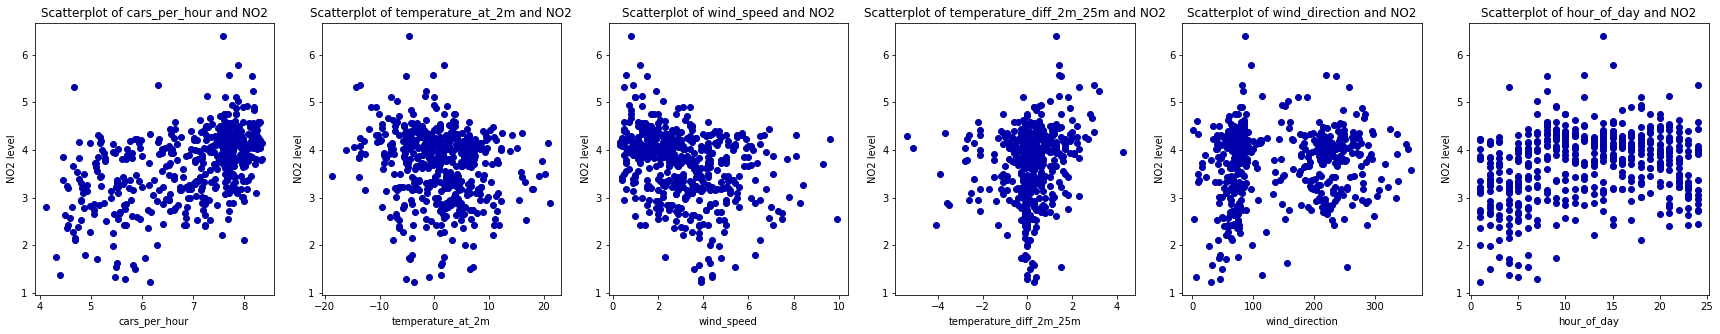

In [7]:
#Create a scatterplot for each attribute with a for loop
fig, axes = plt.subplots(1, 6, figsize= (30, 5));
for i in range (0, 6):
    axes[i].scatter(X[:,i],y); 
    s= attribute_names[i]
    axes[i].set_title("Scatterplot of " + s + " and NO2")
    axes[i].set_xlabel(attribute_names[i]);
    axes[i].set_ylabel("NO2 level")

2_ Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. (2 points)
- Evaluate using cross-validation and the $R^2$ score, with the default parameters. 
- Does scaling the data with StandardScaler help? Make sure you do the scaling correctly in the cross-validation. Provide a concise but meaningful interpretation of the results.

The linear regression, ridge, lasso, elasticnet and knn models are trained and evaluated with cross-validation. This gives more stable results than training and testing with a 75%/25% split. 3 Folds will be used, since this is the default value. 2 Folds are used for training and 1 for testing. This is repeated 3 times, so every fold is used once for testing performance.

**Linear Regression**

In [8]:
#Perform cross-validation with 3 folds
#Calculate the mean and standard deviation of the cross-validation scores
linear_cv = cross_val_score(LinearRegression(), X, y)
print("Cross-validation scores: {}".format(linear_cv))
print("Average cross-validation score: {:.2f}".format(linear_cv.mean()))

Cross-validation scores: [0.454 0.447 0.505]
Average cross-validation score: 0.47


R^2, the score for linear regression, is 0.47 for the cross-validation with 3 folds. 

**Ridge**

In [9]:
#Perform cross-validation with 3 folds on the data set with default alpha
#Calculate the mean and standard deviation of the cross-validation scores
ridge_cv = cross_val_score(Ridge(random_state=0), X, y)
print("Cross-validation scores: {}".format(ridge_cv))
print("Average cross-validation score: {:.2f}".format(ridge_cv.mean()))

Cross-validation scores: [0.455 0.447 0.505]
Average cross-validation score: 0.47


R^2 for the average score of cross validation is 0.47. This means that ridge regression with the default parameter alpha is 1.0 has similar performance as linear regression. The alpha parameter in ridge regression forces coefficients towards 0 with L2 regularization. Hence, the higher the value for alpha, the more regularization takes place.

**Lasso**

In [10]:
#Perform cross-validation with 3 folds on the data set with default alpha
#Calculate the mand and standard deviation of the cross-validation scores
lasso_cv = cross_val_score(Lasso(random_state=0), X, y)
print("Cross-validation scores: {}".format(lasso_cv))
print("Average cross-validation score: {:.2f}".format(lasso_cv.mean()))

Cross-validation scores: [ 0.022 -0.06   0.014]
Average cross-validation score: -0.01


The R^2 for the lasso regressor is -0.01 for the cross-validation. A negative R^2 means that the model fits worse than a horizontal line. This means it performs worse than linear regression and ridge regression when using 1.0 as value for alpha. The alpha parameter in lasso regression forces some coefficients to be exactly 0 with L1 regularizaton. Hence, the larger the value for alpha, the more L1 regularization takes place and the more coefficients become 0.

**ElasticNet**

In [11]:
#Perform cross-validation with 3 folds for the elasticnet.
#Compute the mean and standard deviation for the cross-validation scores.
elasticnet_cv = cross_val_score(ElasticNet(random_state=0), X, y)
print("Cross-validation scores: {}".format(elasticnet_cv))
print("Average cross-validation score: {:.2f}".format(elasticnet_cv.mean()))

Cross-validation scores: [ 0.08  -0.017  0.091]
Average cross-validation score: 0.05


The score of the ElasticNet for the cross-validation is only 0.05. Hence, the performance is bad compared to linear regression and ridge regression and only slightly better than lasso regression. The alpha parameter determines the weight of the regularization. As was the case for ridge and lasso, the default alpha is 1.0. L1_ratio determines the ratio between L1 and L2 regularization. If l1_ratio is 0, only L2 regulization occurs and if it is 1, only L1 regularization occurs. In this case, it is half of each.

**KNN**

In [12]:
#Perform 3-fold cross-validation on the data
#Calculate the mean and standard deviation of the test scores of the cross-validation
knn_cv = cross_val_score(KNeighborsRegressor(), X, y)
print("Cross-validation scores: {}".format(knn_cv))
print("Average cross-validation score: {:.2f}".format(knn_cv.mean()))

Cross-validation scores: [ 0.03  -0.068  0.108]
Average cross-validation score: 0.02


The cross-validation performance score is very low and only 0.02. This means that a KNN regressor which takes 5 neighbors into consideration is bad in predicting and performs approximately the same as the ElasticNet, but worse than the linear regression and ridge models.   

**Data scaling**

To improve the models, it might help to scale the data to bring them to same range with StandardScaler, which rescales the data of each attribute such that the mean is 0 and the variance is 1. For the cross-validation, a pipeline will first be created. Cross-validation splits the original training data into a training and test set (in this case 3 times). Only the part designated as training data in that round should be used to fit the StandardScaler. Since the part that is training data differs per round, the training data cannot be scaled beforehand, because then the fold that is used as test data in the cross-validation would also have been used to fit the scaler. This means that information from the scaling operation leaks into the modeling operation. The pipeline ensures that each time only the fold designated as training data in the cross-validation is scaled and used to fit the regressor. 

In [13]:
from sklearn.pipeline import Pipeline

**Linear regression scaled**

In [14]:
#Cross-validation with 3 folds to fit a linear regression model on scaled data
#Pipeline ensures correct preprocessing steps
#Print the scores, mean and standard deviation of cross-validation
pipe = Pipeline([("scaler", StandardScaler()), ("linear", LinearRegression())]);
linear_scores = cross_val_score(pipe, X, y);
print("Cross-validation scores: {}".format(linear_scores))
print("Average cross-validation score: {:.2f}".format(linear_scores.mean()))

Cross-validation scores: [0.454 0.447 0.505]
Average cross-validation score: 0.47


The mean performance score for the cross-validation is 0.47. This is similar to the performance with the unscaled data. Hence, scaling does not seem to improve the linear regression model.

**Ridge scaled**

In [15]:
#Cross-validation with 3 folds to fit the ridge regressor on scaled training data
#Pipeline to ensure the preprocessing step of scaling the data is correct.
#Print the resulting scores, mean and standard deviation
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])
ridge_scores = cross_val_score(pipe, X, y)
print("Cross-validation scores: {}".format(ridge_scores))
print("Average cross-validation score: {:.2f}".format(ridge_scores.mean()))

Cross-validation scores: [0.455 0.447 0.505]
Average cross-validation score: 0.47


The cross-validation performance score is 0.47. This means the model is similar in performance to the ridge regressor trained on unscaled data and to the scaled and unscaled linear regression models.

**Lasso scaled**

In [16]:
#Perform cross-validation with 3 folds to fit the lasso object to scaled training data
#Use a pipeline to only scale data in the folds used for training the model
#Print the scores, mean and standard deviation
pipe = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso(random_state=0))])
lasso_scores = cross_val_score(pipe, X, y)
print("Cross-validation scores: {}".format(lasso_scores))
print("Average cross-validation score: {:.2f}".format(lasso_scores.mean()))

Cross-validation scores: [-0.016 -0.031 -0.001]
Average cross-validation score: -0.02


The mean cross-validation score is -0.02. Compared to -0.01 score for lasso with unscaled data, the performance is worse. Hence, only scaling the data does not improve the performance of the lasso regressor.

**ElasticNet scaled**

In [17]:
#Cross-validation with 3 folds, an elasticnet and a pipeline
#Print the scores, mean and standard deviation
pipe = Pipeline([("scaler", StandardScaler()), ("elasticNet", ElasticNet(random_state=0))])
elasticnet_scores = cross_val_score(pipe, X, y)
print("Cross-validation scores: {}".format(elasticnet_scores))
print("Average cross-validation score: {:.2f}".format(elasticnet_scores.mean()))

Cross-validation scores: [-0.016 -0.031 -0.001]
Average cross-validation score: -0.02


The cross-validation performance score is -0.02. With unscaled data, the score is 0.05. Hence, scaling the data does not improve the performance for the elasticnet model.

**KNN scaled**

In [18]:
#Cross-validation with 3 folds on the knn regressor
#Print the resulting scores, mean and standard deviation
pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor())])
knn_scores = cross_val_score(pipe, X, y)
print("Cross-validation scores: {}".format(knn_scores))
print("Average cross-validation score: {:.2f}".format(knn_scores.mean()))

Cross-validation scores: [0.465 0.407 0.5  ]
Average cross-validation score: 0.46


The mean cross-validation score is 0.46. For the unscaled KNN regressor, the score is 0.02. Hence, the performance improves considerably with scaled data. It is now approximately equal to the linear regression and ridge.

3_ Tune the parameters of the models using GridSearchCV.  (1 points)
- Vary the most important hyperparameters (alpha and ratio). Do the results improve?
- Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

In [19]:
# You can use this generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name):
    plt.figure();
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax = plt.gca()
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    plt.title(grid_search.best_estimator_.__class__.__name__)

In [20]:
#Create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Another possible way to improve the performance of the models is with grid search. This will tune the hyperparameters (alpha and/or l1_ratio) of the models by trying all possible combinations and finding the hyperparameters with the best performance score. 

**Parameter tuning ridge**

Best cross-validation accuracy: 0.48
Test set score: 0.48
Best parameters: {'alpha': 1}


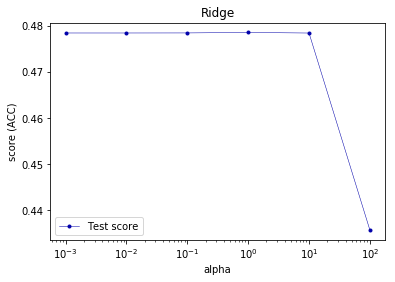

In [21]:
#Ridge
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
#GridSearch Ridge
grid_search_ridge = GridSearchCV(Ridge(random_state=0), param_grid_ridge, cv=3);
grid_search_ridge.fit(X_train, y_train);
#Print results
print("Best cross-validation accuracy: {:.2f}".format(grid_search_ridge.best_score_))
print("Test set score: {:.2f}".format(grid_search_ridge.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_ridge.best_params_))
#Visualize the performance of the ridge regressor per value for alpha
plot_tuning(grid_search_ridge, "alpha");
plt.xscale('log')

According to grid search, the ridge regressor has the best performance (0.48) when alpha is the default 1. Hence, performance improves 0.01 compared to the regular ridge and scaled ridge.

**Parameter tuning Lasso**

Best cross-validation accuracy: 0.48
Test set score: 0.48
Best parameters: {'alpha': 0.001}


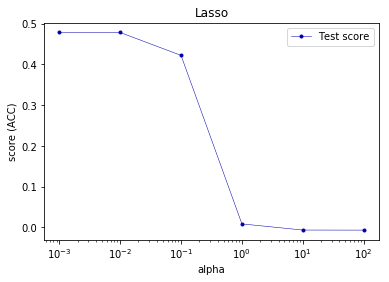

In [22]:
#Lasso
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
#GridSearch Lasso and display results from lasso in a data frame
grid_search_lasso = GridSearchCV(Lasso(random_state=0), param_grid_ridge, cv=3);
grid_search_lasso.fit(X_train, y_train);
#Print results
print("Best cross-validation accuracy: {:.2f}".format(grid_search_lasso.best_score_))
print("Test set score: {:.2f}".format(grid_search_lasso.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_lasso.best_params_))
#Visualize the performance of the lasso regressor per value for alpha
plot_tuning(grid_search_lasso, "alpha")
plt.xscale('log')

According to the results from grid search, the lasso regressor performs best on this data when alpha is 0.001 and almost no regularization occurs. The performance in that case is 0.48. This means lasso improved a lot by tuning the hyperparameter compared to the regular lasso (-0.01) and scaled lasso (-0.02).

**Parameter tuning ElasticNet**

In [23]:
#Grid search for ElasticNet
#The grid search needs to vary two parameters: alpha and l1_ratio
param_grid_elasticNet= [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': np.arange(0, 1.1, 0.1)}]           
grid_search_en = GridSearchCV(ElasticNet(random_state=0), param_grid_elasticNet, cv=3);
grid_search_en.fit(X_train, y_train);  
#Print results
print("Best cross-validation accuracy: {:.2f}".format(grid_search_en.best_score_))
print("Test set score: {:.2f}".format(grid_search_en.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_en.best_params_))

Best cross-validation accuracy: 0.48
Test set score: 0.48
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.0}


In total 66 combinations of parameters were tested (6 alpha values * 11 l1_ratio values). The results from the grid search show that the best combination of parameters is alpha=0.01 and l1_ratio=0 with an score of 0.48. This means that only L2 regularization occurs. The performance of 0.48 is much higher than regular elasticnet (0.05) and scaled elasticnet (-0.02). 

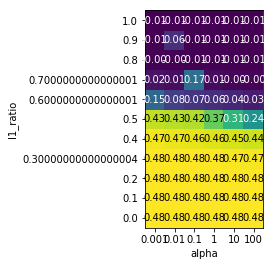

In [24]:
#Visualize the performance score for each combination of alpha and l1_ratio in a heatmap
param_grid_elasticNet_alpha= {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_elasticNet_l1_ratio= {'l1_ratio': np.arange(0, 1.1, 0.1)}
mglearn.tools.heatmap(grid_search_en.cv_results_['mean_test_score'].reshape(11,6), xlabel='alpha', 
                      xticklabels=param_grid_elasticNet_alpha['alpha'], ylabel = 'l1_ratio',
                      yticklabels=param_grid_elasticNet_l1_ratio['l1_ratio'], cmap = 'viridis');

The heatmap visualizes the performance score for a specific combination of alpha and l1_ratio in each grid with colors. The yellow colors illustrate combinations with relatively high performance, green colors intermediate performance, and purple low performance. As can be seen, the lower half of the heatmap is yellow, which means it contains higher performance scores when l1_ratio is below 0.5. 

4_ Visualize the coefficients of the resulting models. (1 point)
- Do they agree on which features are important?

**Coefficients**

For visualization of the coefficients, the models that were trained with hyperparameter tuning are chosen for ridge, lasso and elasticnet, because they performed best. For linear regression, the standard model is selected, since it has no parameters that were tuned and this model performed best.

In [25]:
linear = LinearRegression().fit(X_train, y_train);

Attribute name per attribute index: {0: 'cars_per_hour', 1: 'temperature_at_2m', 2: 'wind_speed', 3: 'temperature_diff_2m_25m', 4: 'hour_of_day'}


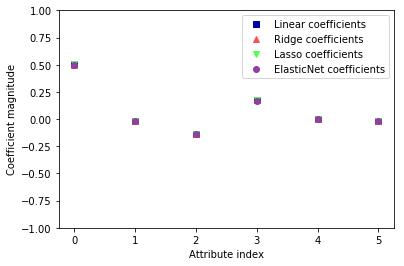

In [26]:
#Create a plot with the attributes on the horizontal axis
#and the magnitude of each attribute for each regressor on the vertical axis
#Values for coefficients are from models optimized with hyperparameter tuning (except linear)
plt.plot(linear.coef_, 's', label="Linear coefficients")
plt.plot(grid_search_ridge.best_estimator_.coef_, '^', label="Ridge coefficients")
plt.plot(grid_search_lasso.best_estimator_.coef_, 'v', label="Lasso coefficients")
plt.plot(grid_search_en.best_estimator_.coef_, 'o', label="ElasticNet coefficients")
plt.xlabel("Attribute index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-1, 1)
plt.legend()
print("Attribute name per attribute index: " + str({0: attribute_names[0], 1: attribute_names[1], 2: attribute_names[2], 3:attribute_names[3], 4:attribute_names[5]}))

This plot visualizes that all regression models have almost the same magnitude for each attribute when the value for hyperparameter tuning is optimized with grid search. 'cars_per_hour' has the largest coefficient. Apparently this attribute has the largest influence on the NO2 level, followed by 'wind_speed' and 'temperature_at_2m'. However, none of the attributes has an extreme value compared to the others.

**Appendix**

The visualization of the coefficients in the plot above does not show many details, since the values for the different models almost coincide. Therefore, another plot was created that zooms in on attribute 0.


Attribute name per coefficient index: {0: 'cars_per_hour'}


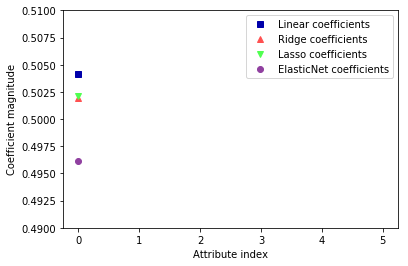

In [27]:
#Plot zooming in on the values of attribute 'cars_per_hour'
plt.plot(linear.coef_, 's', label="Linear coefficients")
plt.plot(grid_search_ridge.best_estimator_.coef_, '^', label="Ridge coefficients")
plt.plot(grid_search_lasso.best_estimator_.coef_, 'v', label="Lasso coefficients")
plt.plot(grid_search_en.best_estimator_.coef_, 'o', label="ElasticNet coefficients")
plt.xlabel("Attribute index")
plt.ylabel("Coefficient magnitude")
plt.ylim(0.49, 0.51)
plt.legend()
print("Attribute name per coefficient index: " + str({0: attribute_names[0]}))

This magnification shows the spread of values for the different regression models for the attribute 'cars_per_hour'. Though it seemed like all coefficients are exactly the same in the previous plot, this plot shows that the values slightly differ per model. However, this difference is small enough to conclude that the regression models agree on the importance of the attributes.

In [28]:
#Create a data frame with the best performance scores for all the models built in this assignment
scores = {}
scores['linear']={}; scores['linear']['n']= np.mean(linear_cv); scores['linear']['s'] = linear_scores.mean(); scores['linear']['p']= 'null';
scores['ridge']={}; scores['ridge']['n']= np.mean(ridge_cv); scores['ridge']['s']= ridge_scores.mean(); scores['ridge']['p']= grid_search_ridge.score(X_test, y_test);
scores['lasso']={}; scores['lasso']['n']= np.mean(lasso_cv); scores['lasso']['s']= lasso_scores.mean(); scores['lasso']['p']= grid_search_lasso.score(X_test, y_test); 
scores['elasticnet']={}; scores['elasticnet']['n']= np.mean(elasticnet_cv); scores['elasticnet']['s']= elasticnet_scores.mean(); scores['elasticnet']['p']= grid_search_en.score(X_test, y_test); 
scores['knn']={}; scores['knn']['n']= np.mean(knn_cv); scores['knn']['s'] = knn_scores.mean(); scores['knn']['p']='null';
bestScores = pd.DataFrame(scores)
bestScores.rename(index={'n':'normal','s':'scaled','p':'hyperparameter tuned'})

,linear,ridge,lasso,elasticnet,knn
normal,0.47,0.47,-7.67e-03,0.05,0.023
hyperparameter tuned,null,0.48,4.82e-01,0.48,null
scaled,0.47,0.47,-1.63e-02,-0.02,0.46


It can be seen from the table that the performance of lasso and elasticnet models increase a lot by tuning the hyperparamters, but ridge regression only increases 0.01. For ridge regression, the default alpha value 1 gives the best result, but grid search found optimal values for the hyperparameters of lasso (alpha=0.001) and elasticnet (alpha=0.01 and l1_ratio=0.0) that are different from the defaults. This table summarizes the results from the assignment. As can be seen, the highest performance score on test data is 0.48. For linear regression and ridge regression, a score of 0.47 can be attained without scaling the data or tuning parameters. Ridge regression increases 0.01 when tuning the parameter alpha. For lasso regression and elasticnet, tuning the parameters is required to achieve a score of 0.48, but scaling the data will not further improve the models. The performance score knn regressor increases a lot when the data is scaled from 0.02 to 0.46.